In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
transaction_df=pd.read_csv("/content/address_data_k.csv")

In [3]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            6920 non-null   int64  
 1   Index                                                 6920 non-null   int64  
 2   Address                                               6920 non-null   object 
 3   FLAG                                                  6920 non-null   int64  
 4   Avg min between sent tnx                              6920 non-null   float64
 5   Avg min between received tnx                          6920 non-null   float64
 6   Time Diff between first and last (Mins)               6920 non-null   float64
 7   Sent tnx                                              6920 non-null   int64  
 8   Received Tnx                                          6920

In [4]:
transaction_df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,6920.000000,6920.000000,6920.0,6920.000000,6920.000000,6.920000e+03,6920.000000,6920.000000,6920.000000,6920.000000,...,6.919000e+03,6.919000e+03,6919.000000,6.919000e+03,6.919000e+03,6919.0,6919.0,6919.0,6919.000000,6919.000000
mean,3459.500000,1770.634249,0.0,5529.674152,9522.562133,2.653822e+05,146.100723,203.536272,5.257659,36.053757,...,1.581217e+08,3.697989e+06,529.936470,6.834080e+05,1.093491e+05,0.0,0.0,0.0,1.385171,5.028617
std,1997.776264,1065.387731,0.0,22875.343417,25365.578012,3.479591e+05,849.884471,1054.359302,168.657160,338.072614,...,1.202328e+10,2.085861e+08,17835.948942,1.824416e+07,6.110101e+06,0.0,0.0,0.0,6.606856,17.772064
min,0.000000,1.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,1729.750000,865.750000,0.0,0.000000,0.000000,3.206775e+02,1.000000,2.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,3459.500000,1730.500000,0.0,22.820000,1410.955000,1.190533e+05,3.000000,5.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
75%,5189.250000,2595.250000,0.0,702.190000,7431.205000,3.897259e+05,16.000000,40.250000,0.000000,5.000000,...,1.000000e+02,3.306338e+01,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,3.000000
max,6919.000000,3987.000000,0.0,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,990000.000000,1.000010e+09,5.000050e+08,0.0,0.0,0.0,213.000000,737.000000


In [5]:
transaction_df.isnull().sum()

Unnamed: 0                                               0
Index                                                    0
Address                                                  0
FLAG                                                     0
Avg min between sent tnx                                 0
Avg min between received tnx                             0
Time Diff between first and last (Mins)                  0
Sent tnx                                                 0
Received Tnx                                             0
Number of Created Contracts                              0
Unique Received From Addresses                           0
Unique Sent To Addresses                                 0
min value received                                       0
max value received                                       0
avg val received                                         0
min val sent                                             0
max val sent                                            

In [6]:
transaction_df['avg val sent'].unique()

array([1.200681, 0.032844, 1.794308, ..., 1.031711, 0.39086 , 2.502376])

In [7]:
transaction_df.shape

(6920, 51)

In [8]:
transaction_df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [9]:

transaction_df.nunique()

Unnamed: 0                                              6920
Index                                                   3987
Address                                                 6895
FLAG                                                       1
Avg min between sent tnx                                3964
Avg min between received tnx                            4454
Time Diff between first and last (Mins)                 5674
Sent tnx                                                 604
Received Tnx                                             674
Number of Created Contracts                               19
Unique Received From Addresses                           205
Unique Sent To Addresses                                 243
min value received                                      3619
max value received                                      5081
avg val received                                        4933
min val sent                                            3418
max val sent            

(0, 51)

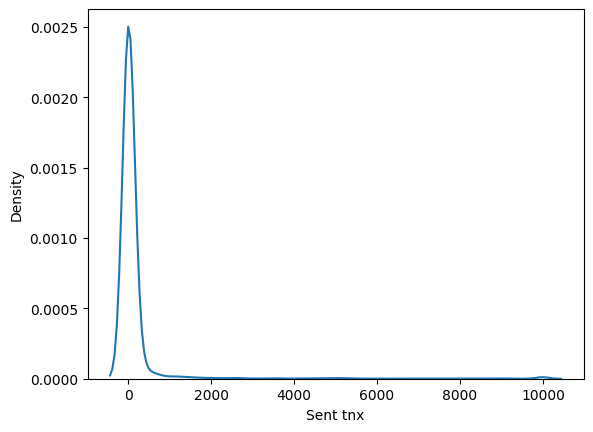

In [10]:
sns.kdeplot(transaction_df['Sent tnx'])
transaction_df[(transaction_df['Sent tnx'] <2) & (transaction_df['FLAG'] == 1)].shape

#Cleaning Dataset
* Removing row data that have NaN values
* Removing colums that are empty/constant values

In [11]:
# Removing NaN values from dataset
transaction_df = transaction_df.dropna()
# Removing columns that are empty
empty_columns = [' ERC20 avg time between contract tnx', ' ERC20 max val sent contract', ' ERC20 min val sent contract', ' ERC20 avg val sent contract', ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx']
transaction_df = transaction_df.drop(columns = empty_columns)

#Conducting Correlation Analysis for Feature Reduction

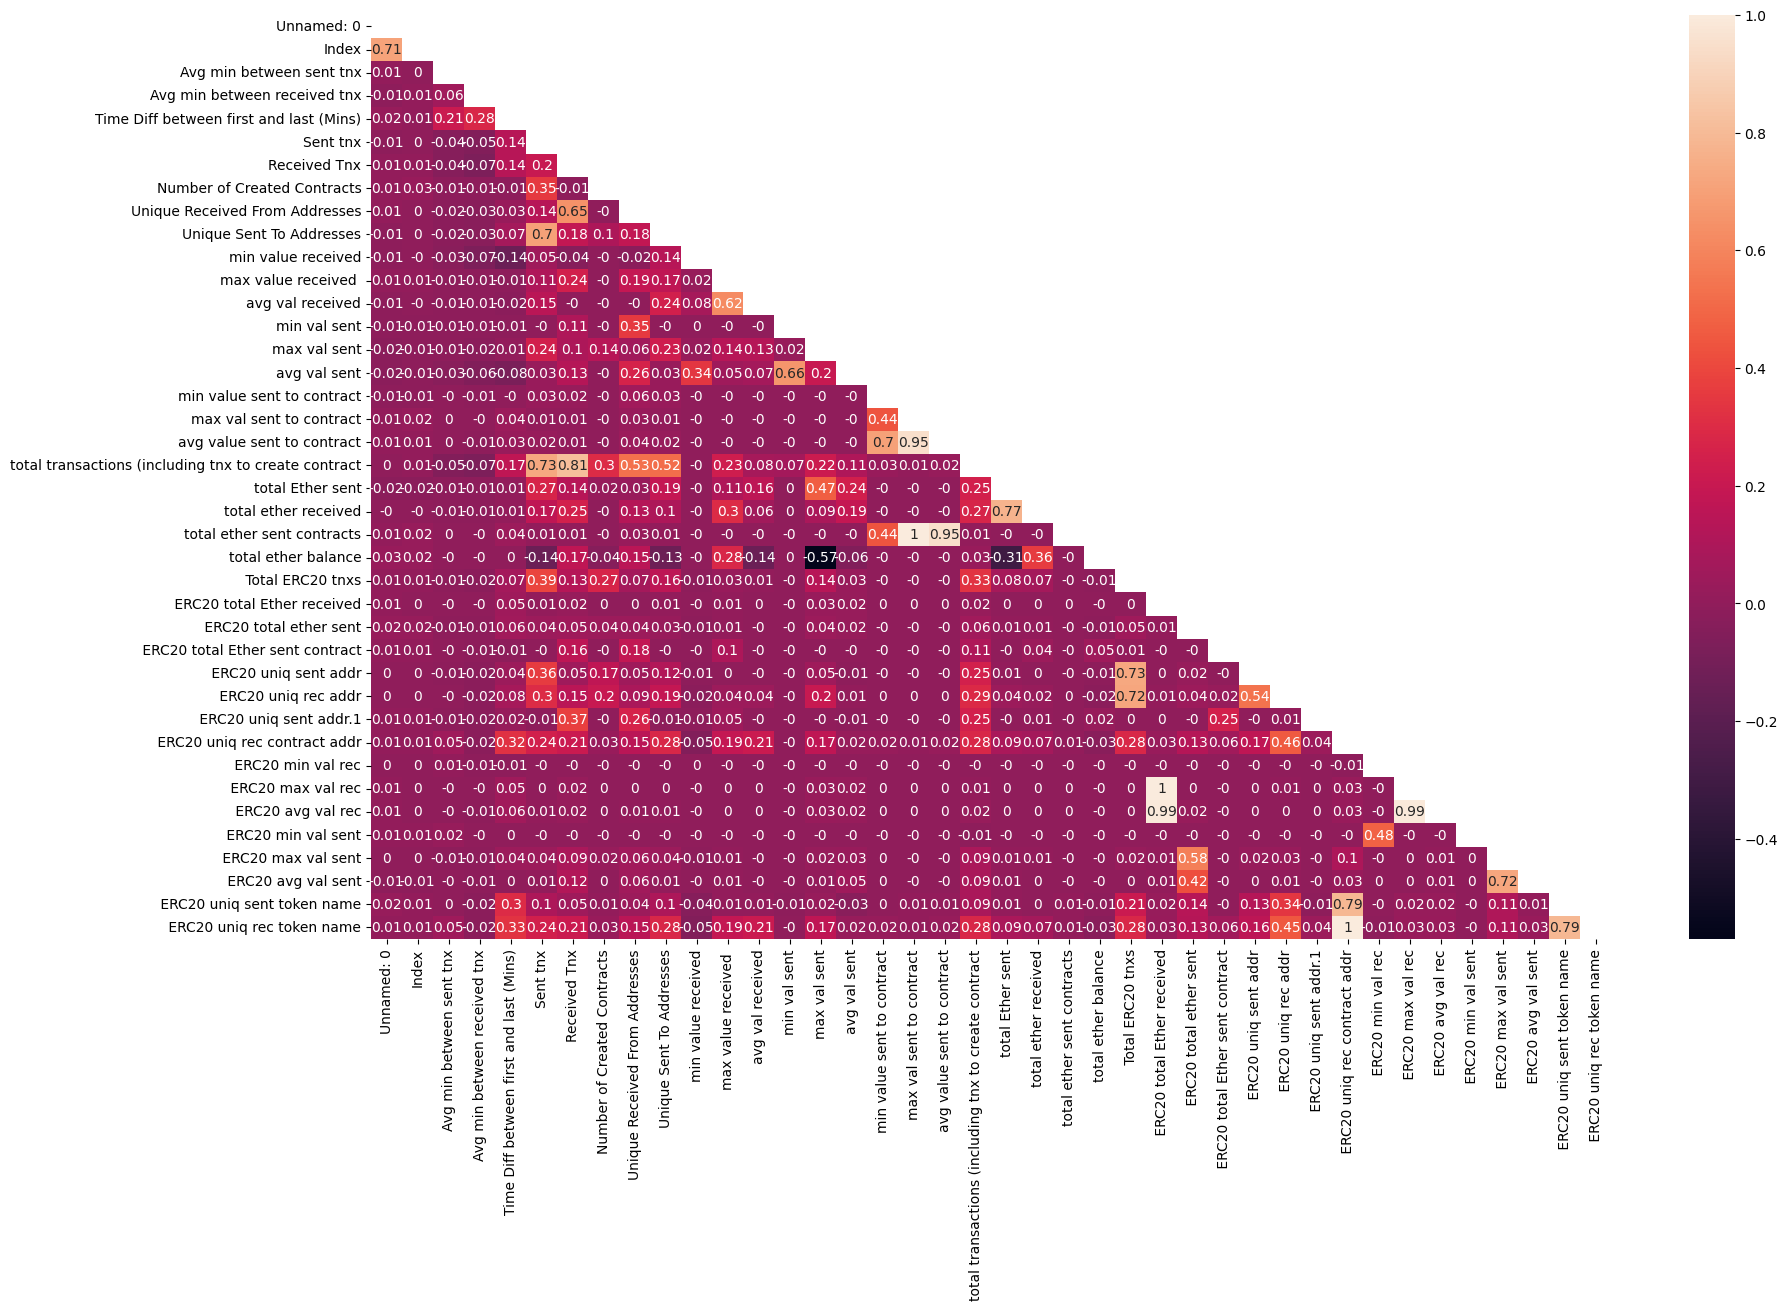

In [12]:
# Removing Flag Label
feature_transaction_df = transaction_df.drop(columns = 'FLAG')

# Plotting Correlation Matrix to see understand which features are highly correlated
numeric_transaction_df = feature_transaction_df = transaction_df.drop(columns = 'FLAG').select_dtypes(include=np.number) #
corr_matrix = numeric_transaction_df.corr().round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, mask=mask, annot = True)

# corr_matrix.style.background_gradient(cmap='coolwarm')
plt.show()


In [13]:
# Finding correlations that are above 0.7
correlation_threshold = 0.7
reduced_corr_matrix = corr_matrix.mask(mask)
corr_matrix_unstacked = reduced_corr_matrix.unstack()
similar_features = corr_matrix_unstacked[abs(corr_matrix_unstacked) >= correlation_threshold].reset_index().rename(columns={'level_0': 'feature_1', 'level_1': 'feature_2', 0: 'Absolute Correlation'})
similar_features.sort_values(by="Absolute Correlation",ascending=False)

,feature_1,feature_2,Absolute Correlation
11,ERC20 total Ether received,ERC20 max val rec,1.00
14,ERC20 uniq rec contract addr,ERC20 uniq rec token name,1.00
6,max val sent to contract,total ether sent contracts,1.00
15,ERC20 max val rec,ERC20 avg val rec,0.99
12,ERC20 total Ether received,ERC20 avg val rec,0.99
5,max val sent to contract,avg value sent to contract,0.95
7,avg value sent to contract,total ether sent contracts,0.95
3,Received Tnx,total transactions (including tnx to create co...,0.81
17,ERC20 uniq sent token name,ERC20 uniq rec token name,0.79
13,ERC20 uniq rec contract addr,ERC20 uniq sent token name,0.79


In [14]:
# Doing Dimensionality Reduction
erc20_dim_red_df = transaction_df[[' ERC20 total Ether received', ' ERC20 avg val sent', ' ERC20 max val rec',
                ' ERC20 total ether sent', ' ERC20 avg val rec', ' ERC20 max val sent']]

erc20_dim_red_df

,ERC20 total Ether received,ERC20 avg val sent,ERC20 max val rec,ERC20 total ether sent,ERC20 avg val rec,ERC20 max val sent
0,3.558854e+07,271779.920000,1.500000e+07,3.560317e+07,265586.147600,1.683100e+07
1,4.034283e+02,2.260809,3.650000e+02,2.260809e+00,57.632615,2.260809e+00
2,5.215121e+02,0.000000,4.428198e+02,0.000000e+00,65.189009,0.000000e+00
3,1.711105e+04,3804.076893,1.141223e+04,1.141223e+04,1555.550174,9.029231e+03
4,1.628297e+05,13726.659220,9.000000e+04,1.235399e+05,4934.232147,4.500000e+04
...,...,...,...,...,...,...
6914,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
6915,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
6916,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
6917,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00


In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_erc20_data = scaler.fit_transform(erc20_dim_red_df)


pca_2 = PCA(n_components=2)
pca_2_features = pca_2.fit_transform(scaled_erc20_data)

In [16]:
model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(pca_2_features)
tsne_features

array([[ 49.55893  ,   9.794529 ],
       [-50.83994  ,  -4.775771 ],
       [-38.064285 , -54.204    ],
       ...,
       [ -9.536631 ,   7.9760294],
       [ -9.536631 ,   7.9760294],
       [ -9.536631 ,   7.9760294]], dtype=float32)

In [17]:
tsne_features[1:4, :]

array([[-50.83994 ,  -4.775771],
       [-38.064285, -54.204   ],
       [-21.629162,  -8.108101]], dtype=float32)

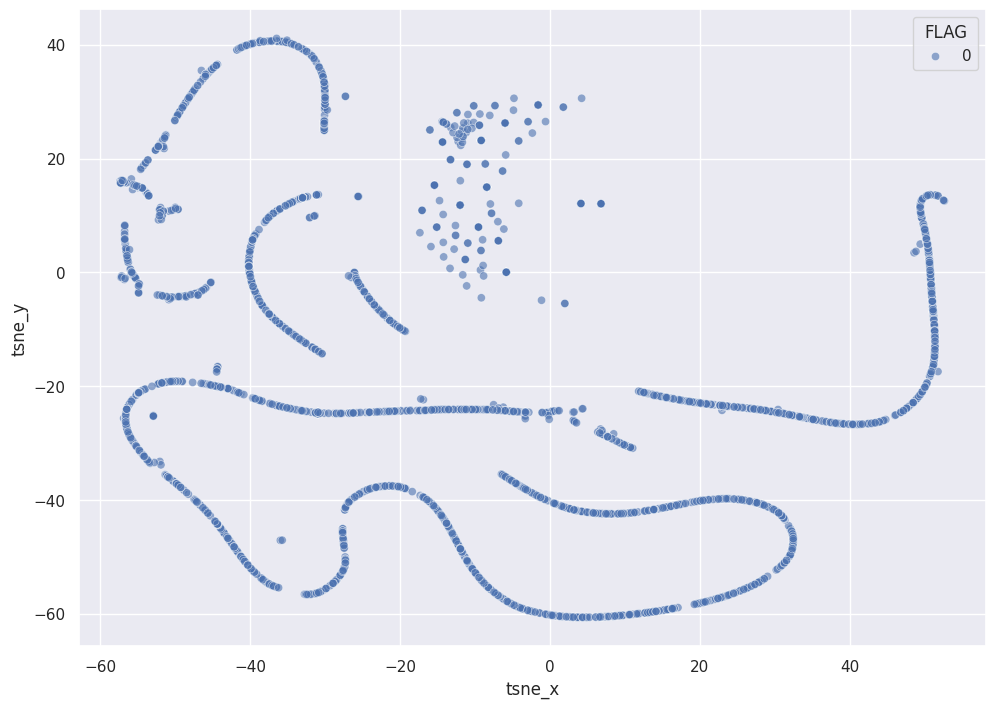

In [18]:
import seaborn as sns

transaction_df['tsne_x'] = tsne_features[:,0]
transaction_df['tsne_y'] = tsne_features[:,1]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='tsne_x',y='tsne_y',data=transaction_df,alpha=0.6,hue='FLAG',style='FLAG')
plt.show()

#Model Configuration and training

##Logistic regression Model

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

import warnings
warnings.filterwarnings('ignore')

In [20]:
#Importing Data
df = pd.read_csv('address_data_combined.csv')
X = df.drop(columns=['Address', 'FLAG'])
y = df['FLAG']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


columns = ['Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)',
       'Unique Received From Addresses', 'min value received',
       'max value received ', 'avg val received', 'min val sent',
       'avg val sent', 'total transactions (including tnx to create contract',
       'total ether received', 'total ether balance']

scaler = MinMaxScaler()

# Log for Skewed Data
for c in columns:
    X_train_full[c] = X_train_full[c].apply(lambda x: np.log(x) if x > 0 else 0)
    X_test[c] = X_test[c].apply(lambda x: np.log(x) if x > 0 else 0)

# Scaling
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

np.isnan(X_train_full)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import time

logreg = LogisticRegression()
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='f1',        # metric for scoring
                   cv=10)                     # number of folds
start_time = time.time()
clf.fit(X_train_full ,y_train_full)
print(time.time() - start_time)

137.00543570518494


In [22]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Train F1 Score :",clf.best_score_)
best_y_pr = clf.predict(X_test)
print('Test F1 Score: ', f1_score(y_test, best_y_pr))

Tuned Hyperparameters : {'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Train F1 Score : 0.8356468258800731
Test F1 Score:  0.8360406091370559


In [23]:
from sklearn.metrics import f1_score, roc_auc_score, recall_score, accuracy_score, precision_score
logreg = LogisticRegression(C=1000,penalty="l1",solver='liblinear')
logreg.fit(X_train_full,y_train_full)
y_pred = logreg.predict(X_test)
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8360406091370559
0.8474636012350274
0.8420245398773006
0.8478926300918296
0.8301411290322581


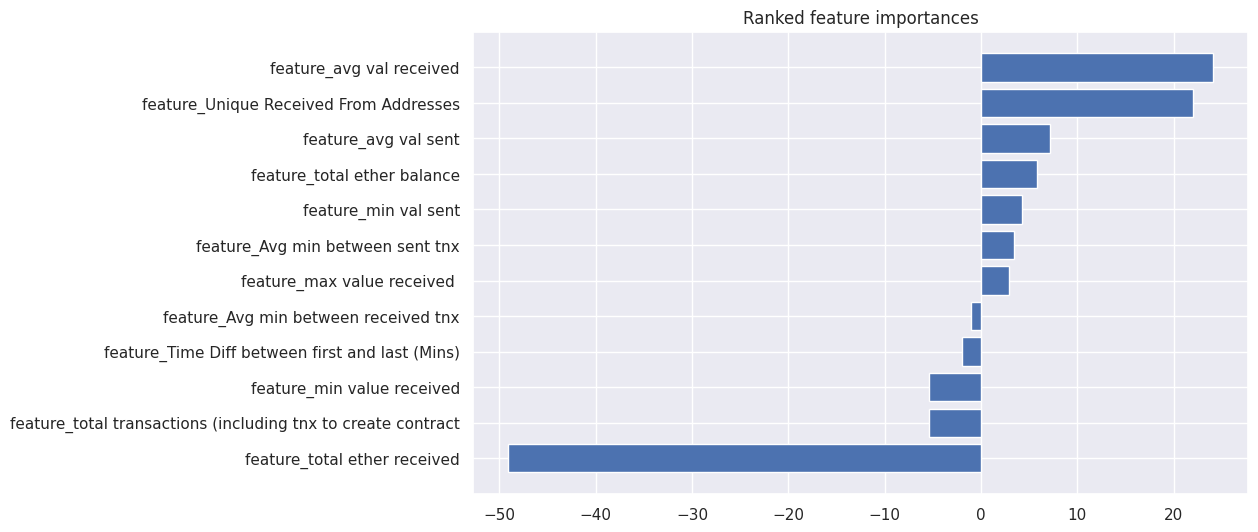

In [24]:
feat_importances = clf.best_estimator_.coef_[0]
indices = np.argsort(feat_importances)
# plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Ranked feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices], align="center")
features = ['feature_{}'.format(columns[i]) for i in range(len(columns))]
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show();

#Naive Bayes Classifier

In [25]:
from sklearn.naive_bayes import GaussianNB
###Creating Naive Bayes Classifier Model
GNB = GaussianNB(var_smoothing=2e-9)
GNB.fit(X_train_full,y_train_full)
y_pr = GNB.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pr))
print('F1 Score: ', f1_score(y_test, y_pr))

Accuracy Score:  0.7732517070873558
F1 Score:  0.768231046931408


In [26]:
### Doing Grid Search to find best hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100),
}

grid_search_nb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=2, cv=5, scoring='f1')

In [27]:
import time
start_time = time.time()
grid_search_nb.fit(X_train_full,y_train_full)
print(time.time() - start_time)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.6

In [28]:
print("Tuned Hyperparameters :", grid_search_nb.best_params_)
print("Train F1 Score :",grid_search_nb.best_score_)
best_y_pr = grid_search_nb.predict(X_test)
print('Test F1 Score: ', f1_score(y_test, best_y_pr))

Tuned Hyperparameters : {'var_smoothing': 0.0533669923120631}
Train F1 Score : 0.7770198619447811
Test F1 Score:  0.7796856106408706


In [29]:
from sklearn.metrics import f1_score, roc_auc_score, recall_score, accuracy_score, precision_score
logreg = GaussianNB(var_smoothing=0.0533669923120631)
logreg.fit(X_train_full,y_train_full)
y_pred = logreg.predict(X_test)
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.7796856106408706
0.7883203501922255
0.8241308793456033
0.7854956439839887
0.7397888939880679


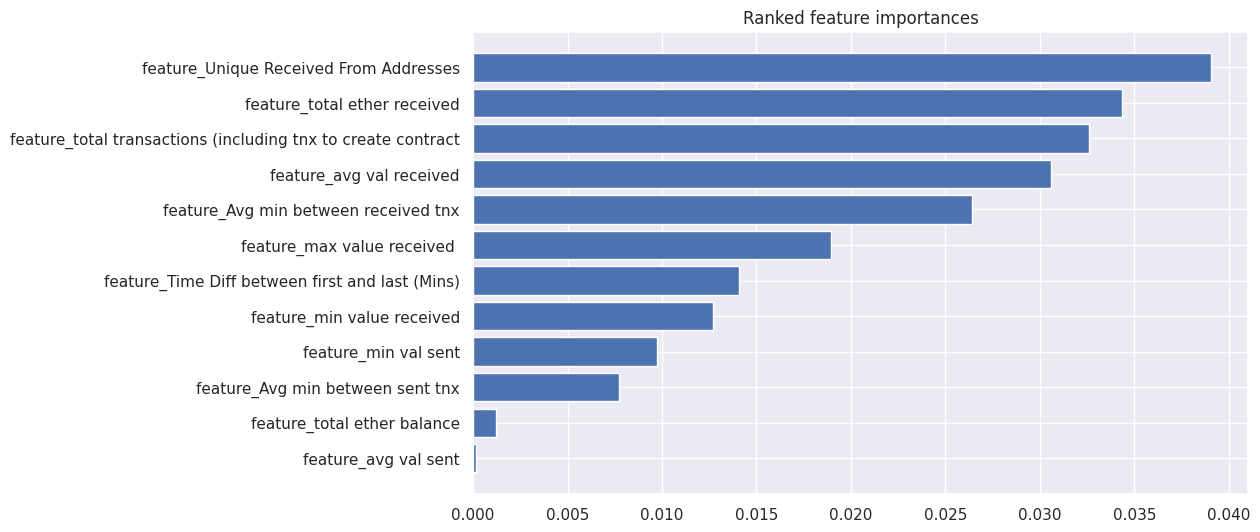

In [30]:
from sklearn.inspection import permutation_importance
feat_importances = permutation_importance(grid_search_nb, X_test, y_test)['importances_mean']
indices = np.argsort(feat_importances)
# plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Ranked feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices], align="center")
features = ['feature_{}'.format(columns[i]) for i in range(len(columns))]
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show();

#Support vector Machine

In [33]:
from sklearn.svm import SVC
tuned_parameters = [
    { "gamma": [1,0.1,0.01,0.001], "C": [1, 10, 100, 1000]},
]

grid = GridSearchCV(SVC(kernel='linear'),tuned_parameters, refit=True,verbose=2,cv=5, scoring='f1')
grid.fit(X_train_full,y_train_full)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................................C=1, gamma=1; total time=   2.3s
[CV] END .......................................C=1, gamma=1; total time=   2.2s
[CV] END .......................................C=1, gamma=1; total time=   3.0s
[CV] END .......................................C=1, gamma=1; total time=   2.0s
[CV] END .......................................C=1, gamma=1; total time=   1.3s
[CV] END .....................................C=1, gamma=0.1; total time=   1.3s
[CV] END .....................................C=1, gamma=0.1; total time=   1.2s
[CV] END .....................................C=1, gamma=0.1; total time=   1.3s
[CV] END .....................................C=1, gamma=0.1; total time=   1.3s
[CV] END .....................................C=1, gamma=0.1; total time=   1.3s
[CV] END ....................................C=1, gamma=0.01; total time=   1.4s
[CV] END ....................................C=1

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001]}],
             scoring='f1', verbose=2)

In [34]:
grid.best_params_

{'C': 1000, 'gamma': 1}

In [35]:
grid.best_score_

0.8464033748174989

In [36]:
from sklearn.metrics import accuracy_score
predicted_y_acc = grid.predict(X_test)
predicted_y_acc = (predicted_y_acc > 0.5).astype('int32')
accuracy_score(predicted_y_acc, y_test)

0.8610784082882035

In [37]:
print("Tuned Hyperparameters :", grid.best_params_)
print("Train F1 Score :",grid.best_score_)
best_y_pr = grid.predict(X_test)
print('Test F1 Score: ', f1_score(y_test, best_y_pr))

Tuned Hyperparameters : {'C': 1000, 'gamma': 1}
Train F1 Score : 0.8464033748174989
Test F1 Score:  0.8484069886947584


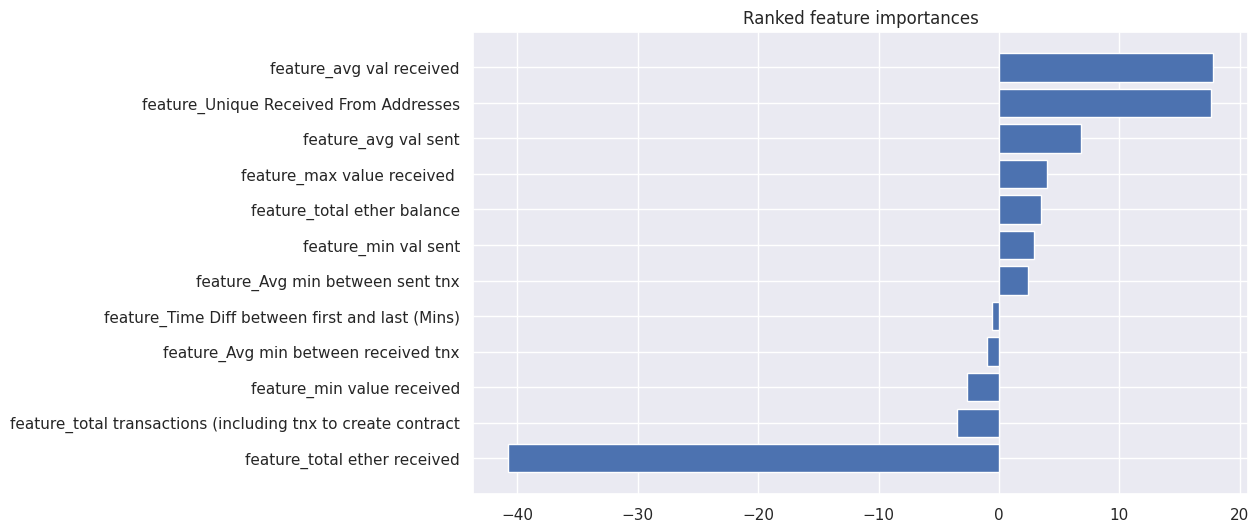

In [38]:
from matplotlib import pyplot as plt
feat_importances = grid.best_estimator_.coef_[0]
indices = np.argsort(feat_importances)
# plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Ranked feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices], align="center")
features = ['feature_{}'.format(columns[i]) for i in range(len(columns))]
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show();

# Random Forest Classifier

In [39]:
df_combine = pd.read_csv('address_data_k.csv')
print(df_combine.shape)
print(df_combine.head())
f_txn = len(df_combine[df_combine['FLAG'] == 1])
print('current amount of fraud is now ', f_txn, ' which is ', (f_txn/len(df_combine))*100, ' % of the original dataset')

(9841, 51)
   Unnamed: 0  Index                                     Address  FLAG  \
0           0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1           1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2           2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3           3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4           4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   

   Avg min between sent tnx  Avg min between received tnx  \
0                    844.26                       1093.71   
1                  12709.07                       2958.44   
2                 246194.54                       2434.02   
3                  10219.60                      15785.09   
4                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               12182

In [40]:
df_combine = df_combine.dropna()
print(df_combine.shape)

(8981, 51)


In [41]:
df_combine.nunique()

Unnamed: 0                                              8981
Index                                                   4722
Address                                                 8956
FLAG                                                       2
Avg min between sent tnx                                4809
Avg min between received tnx                            5796
Time Diff between first and last (Mins)                 7256
Sent tnx                                                 634
Received Tnx                                             720
Number of Created Contracts                               20
Unique Received From Addresses                           248
Unique Sent To Addresses                                 253
min value received                                      4422
max value received                                      6092
avg val received                                        6383
min val sent                                            4418
max val sent            

In [42]:
# dropping columns that have nunique values < 5 <- not useful features
constant_columns = ['Unnamed: 0', 'Index', ' ERC20 uniq sent addr.1', ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract']
df_combine.drop(constant_columns,axis=1,inplace=True)
print(df_combine.shape)

(8981, 43)


In [43]:
df_combine.nunique()

Address                                                 8956
FLAG                                                       2
Avg min between sent tnx                                4809
Avg min between received tnx                            5796
Time Diff between first and last (Mins)                 7256
Sent tnx                                                 634
Received Tnx                                             720
Number of Created Contracts                               20
Unique Received From Addresses                           248
Unique Sent To Addresses                                 253
min value received                                      4422
max value received                                      6092
avg val received                                        6383
min val sent                                            4418
max val sent                                            6304
avg val sent                                            5465
min value sent to contra

In [44]:
# First performing random forest
print('Random forest can only classify numerical columns, hence further processing needs to be done')
df_combine_forest = df_combine.select_dtypes(include='number')
print(df_combine_forest.shape)
print('3 columns have been dropped')

Random forest can only classify numerical columns, hence further processing needs to be done
(8981, 40)
3 columns have been dropped


In [45]:

x = df_combine_forest.drop('FLAG',axis=1)
print(x.shape)
y = df_combine_forest['FLAG'] # y_column needs to be 1d
print(y.shape)

(8981, 39)
(8981,)


In [46]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6286, 39), (2695, 39), (6286,), (2695,))

In [47]:
# Hyperparameter tuning for random forest using gridsearchcv to fit the data

rf = RandomForestClassifier(random_state=42,n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

In [48]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="f1")

In [49]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='f1', verbose=1)

In [50]:
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
print(rf_best)

0.9167926811452456
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)


In [51]:
from sklearn.metrics import f1_score, roc_auc_score, recall_score, accuracy_score, precision_score
rf = RandomForestClassifier(max_depth=20,min_samples_leaf=5,n_estimators=50,n_jobs=-1,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.926261319534282
0.9397919025284381
0.8839506172839506
0.9788497217068646
0.9728260869565217


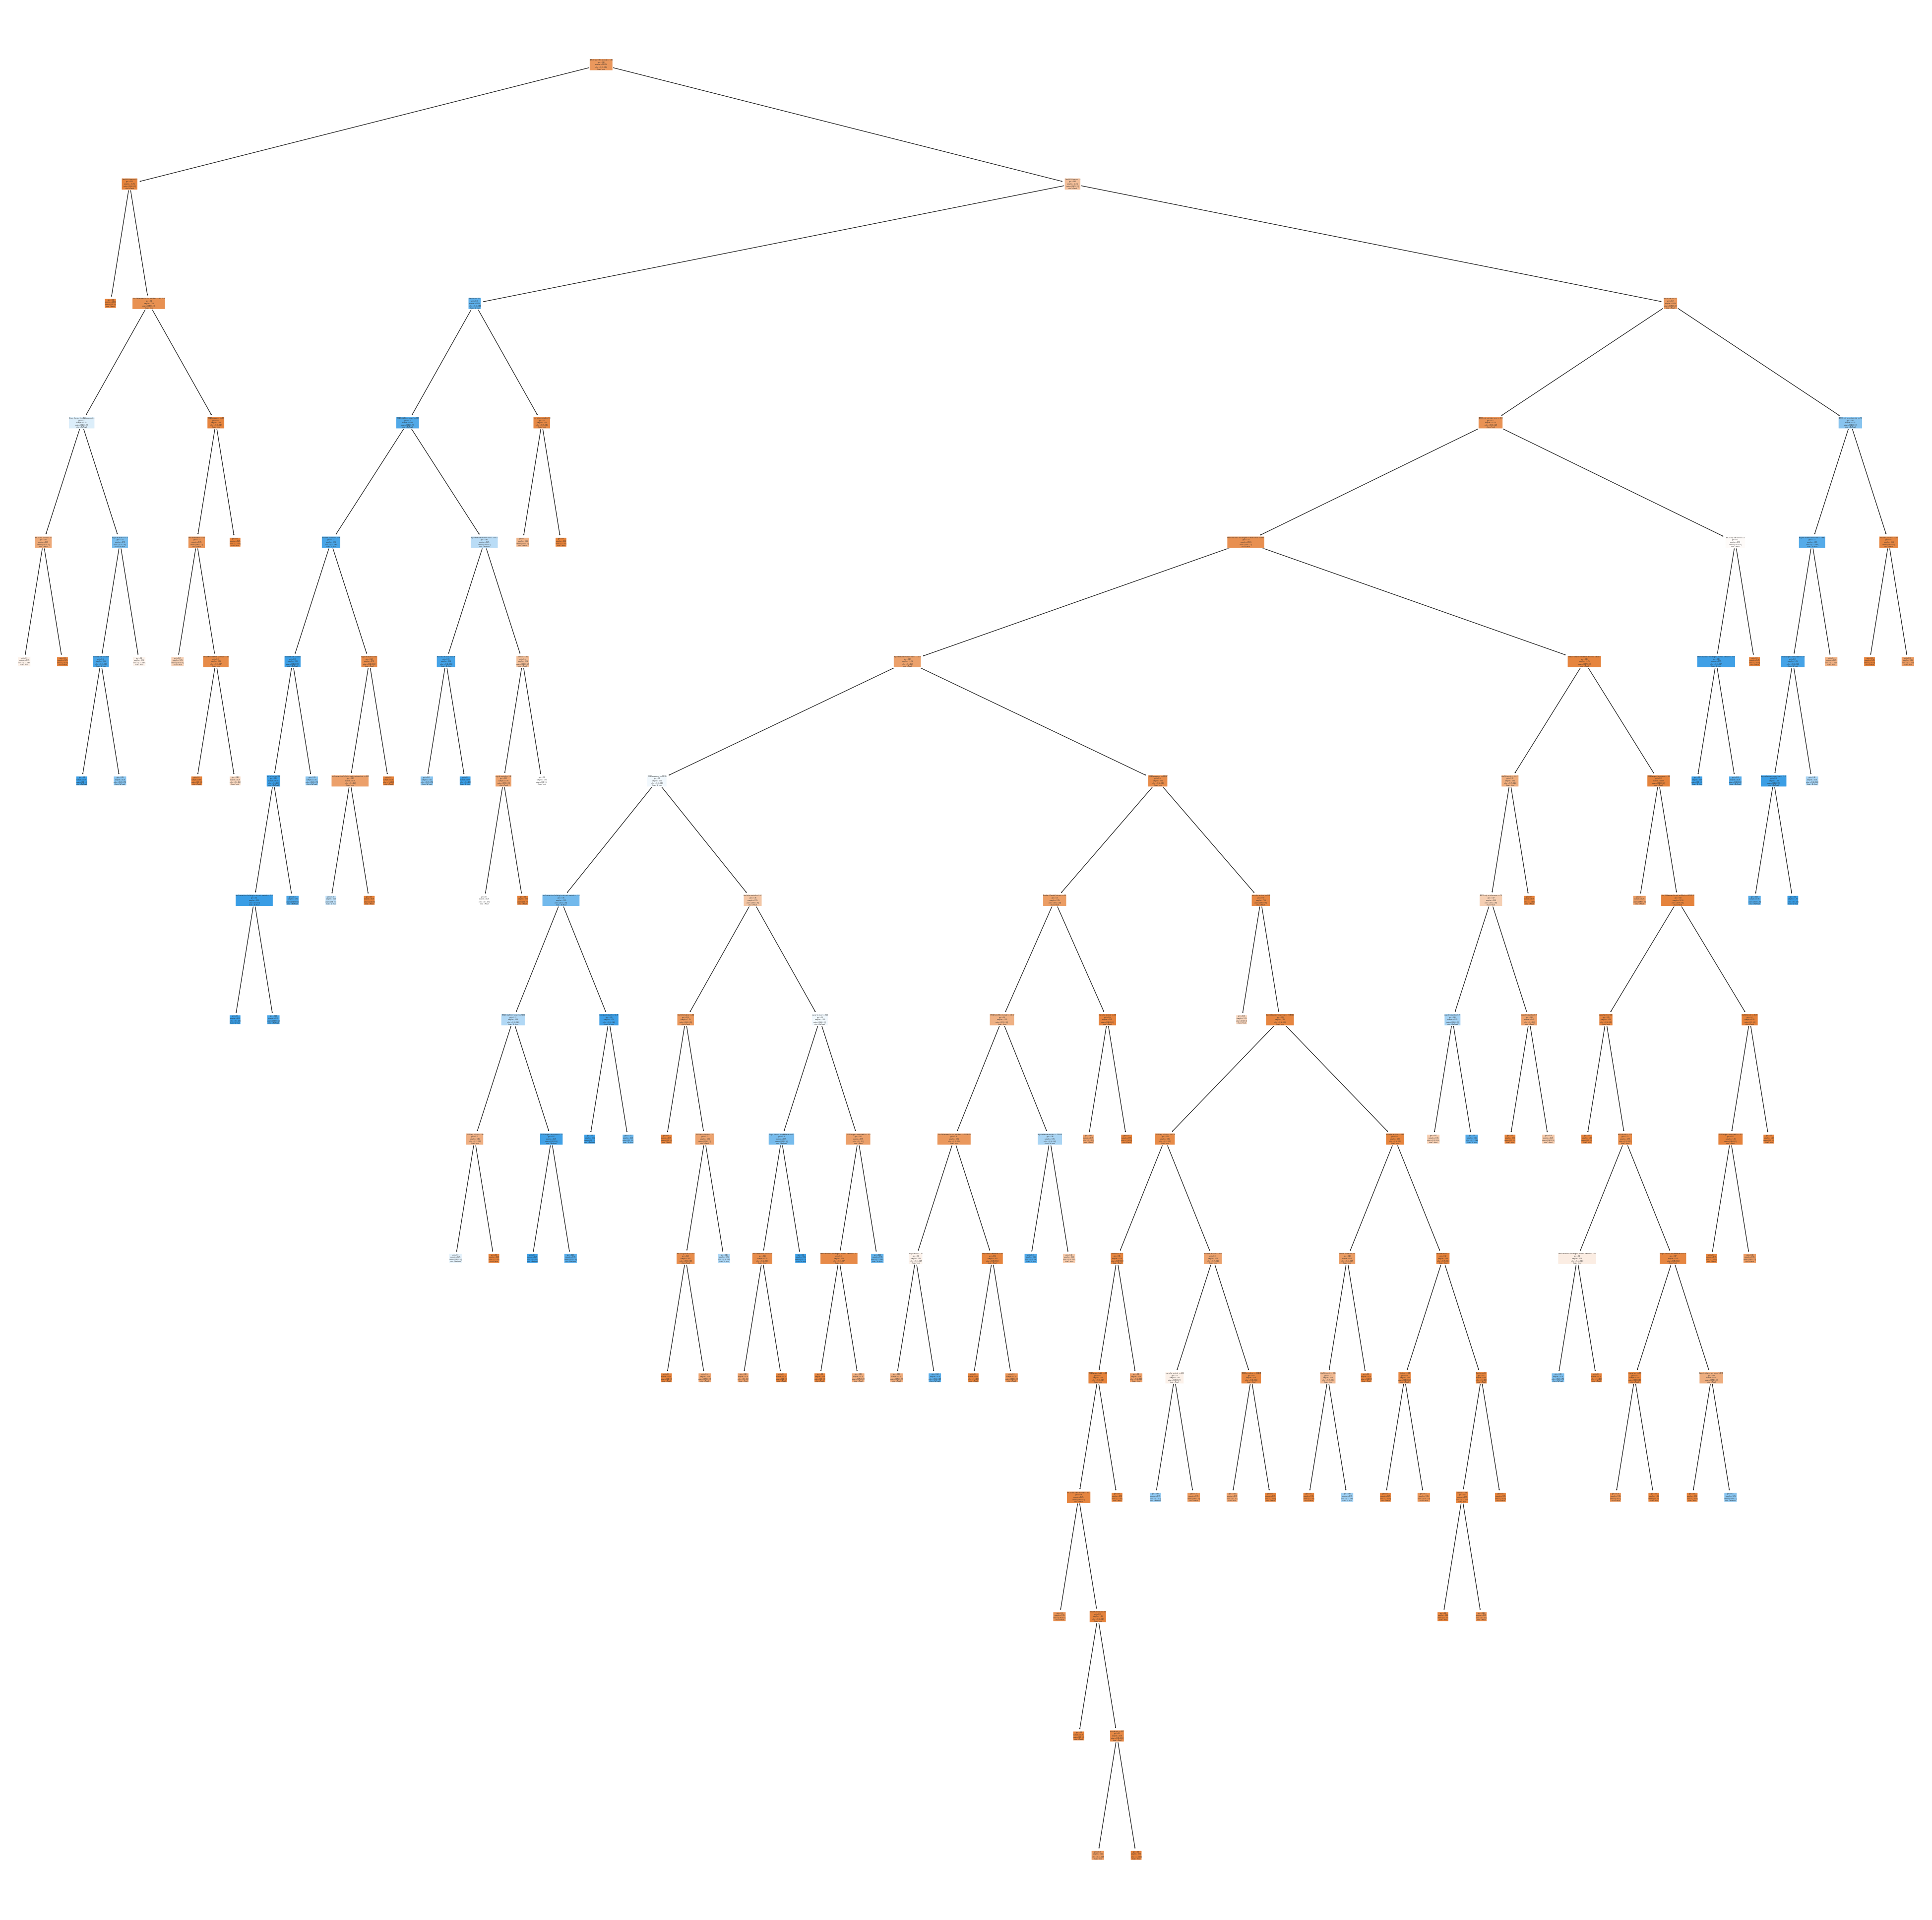

In [52]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(rf_best.estimators_[5], feature_names = x.columns,class_names=['Fraud', "No Fraud"],filled=True,proportion=True,rounded=True,precision=2)
plt.savefig("tree.eps")

In [53]:
# sorting the date by feature importance
rf_best.feature_importances_

array([0.00629456, 0.07137253, 0.12718422, 0.02334108, 0.02524476,
       0.00540783, 0.05465935, 0.00344624, 0.0059909 , 0.00835943,
       0.02375175, 0.0252212 , 0.00605875, 0.00813084, 0.        ,
       0.        , 0.        , 0.06140812, 0.01371261, 0.04254631,
       0.        , 0.01746837, 0.06026587, 0.06266366, 0.00662805,
       0.        , 0.00865967, 0.02297765, 0.03785505, 0.        ,
       0.        , 0.09995818, 0.06681462, 0.02923248, 0.00890112,
       0.0035872 , 0.00522437, 0.01290235, 0.04473089])

In [54]:
feature_imp_df = pd.DataFrame({
    "Features" : X_train.columns,
    "Importance" : rf_best.feature_importances_
})
feature_imp_df.sort_values(by="Importance",ascending=False)

,Features,Importance
2,Time Diff between first and last (Mins),0.127184
31,ERC20 min val rec,0.099958
1,Avg min between received tnx,0.071373
32,ERC20 max val rec,0.066815
23,ERC20 total Ether received,0.062664
17,total transactions (including tnx to create co...,0.061408
22,Total ERC20 tnxs,0.060266
6,Unique Received From Addresses,0.054659
38,ERC20 uniq rec token name,0.044731
19,total ether received,0.042546


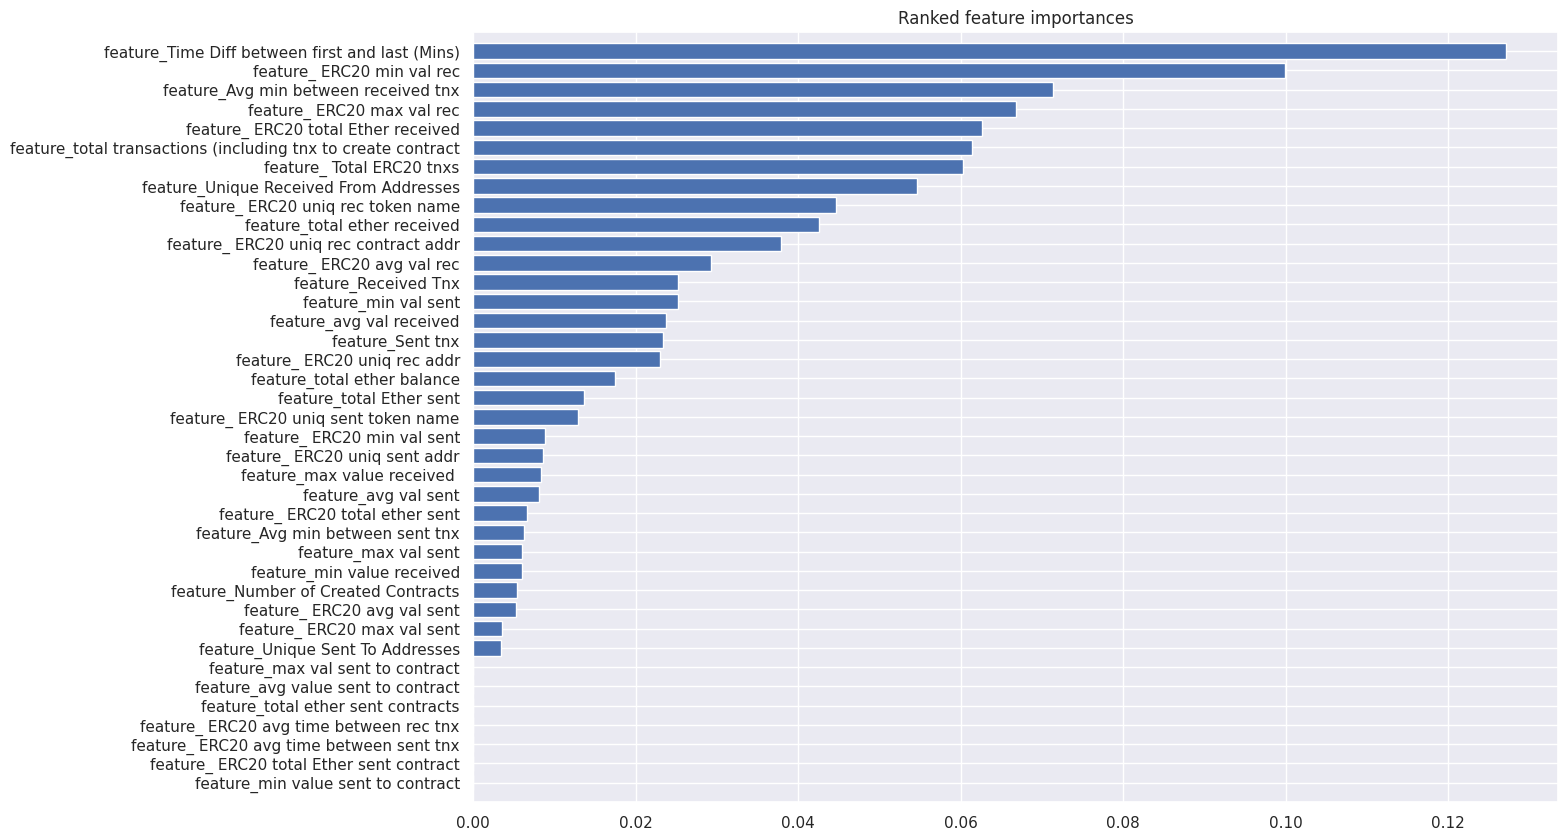

In [55]:
from matplotlib import pyplot as plt
feat_importances = rf_best.feature_importances_
indices = np.argsort(feat_importances)
# plot
columns = np.array(X_train.columns)
fig, ax = plt.subplots(figsize=(14, 10))
plt.title("Ranked feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices], align="center")
features = ['feature_{}'.format(columns[i]) for i in range(len(columns))]
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show();

#Naive Bayes Classifier